In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import glob as gb
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping
from tensorflow.python.ops.numpy_ops import np_utils
import os
from keras.applications.vgg16 import VGG16

In [2]:
!pip install -q kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"upadhyayroshan","key":"0549699db6f2d465b7b5794ac37a2262"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d muratkokludataset/rice-image-dataset

100% 219M/219M [00:11<00:00, 23.3MB/s]
100% 219M/219M [00:11<00:00, 20.1MB/s]


In [6]:
from zipfile import ZipFile
file_name = 'rice-image-dataset.zip'
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [7]:
path = '/content/Rice_Image_Dataset'

In [8]:
for folder in  os.listdir(path): 
    files = gb.glob(pathname= str( path + '/' + folder + '/*.jpg'))
    print(f'For data , found {len(files)} in folder {folder}')

For data , found 15000 in folder Karacadag
For data , found 15000 in folder Jasmine
For data , found 15000 in folder Arborio
For data , found 15000 in folder Ipsala
For data , found 15000 in folder Basmati
For data , found 0 in folder Rice_Citation_Request.txt


In [9]:
code = {'Karacadag':0 ,'Basmati':1 ,'Jasmine':2,'Arborio':3, 'Ipsala':4}
def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x 

In [10]:
size = []
for folder in  os.listdir(path) : 
    files = gb.glob(pathname= str( path + '/' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts

<bound method IndexOpsMixin.value_counts of 0        (250, 250, 3)
1        (250, 250, 3)
2        (250, 250, 3)
3        (250, 250, 3)
4        (250, 250, 3)
             ...      
74995    (250, 250, 3)
74996    (250, 250, 3)
74997    (250, 250, 3)
74998    (250, 250, 3)
74999    (250, 250, 3)
Length: 75000, dtype: object>

In [11]:
s = 100
X_Images = []
y_Types = []
for folder in  os.listdir(path) : 
    files = gb.glob(pathname= str( path + '/' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_Images.append(list(image_array))
        y_Types.append(code[folder])

In [12]:
print(f'we have {len(X_Images)} items in X_Images')
print(f'we have {len(y_Types)} items in Y_Types')

we have 75000 items in X_Images
we have 75000 items in Y_Types


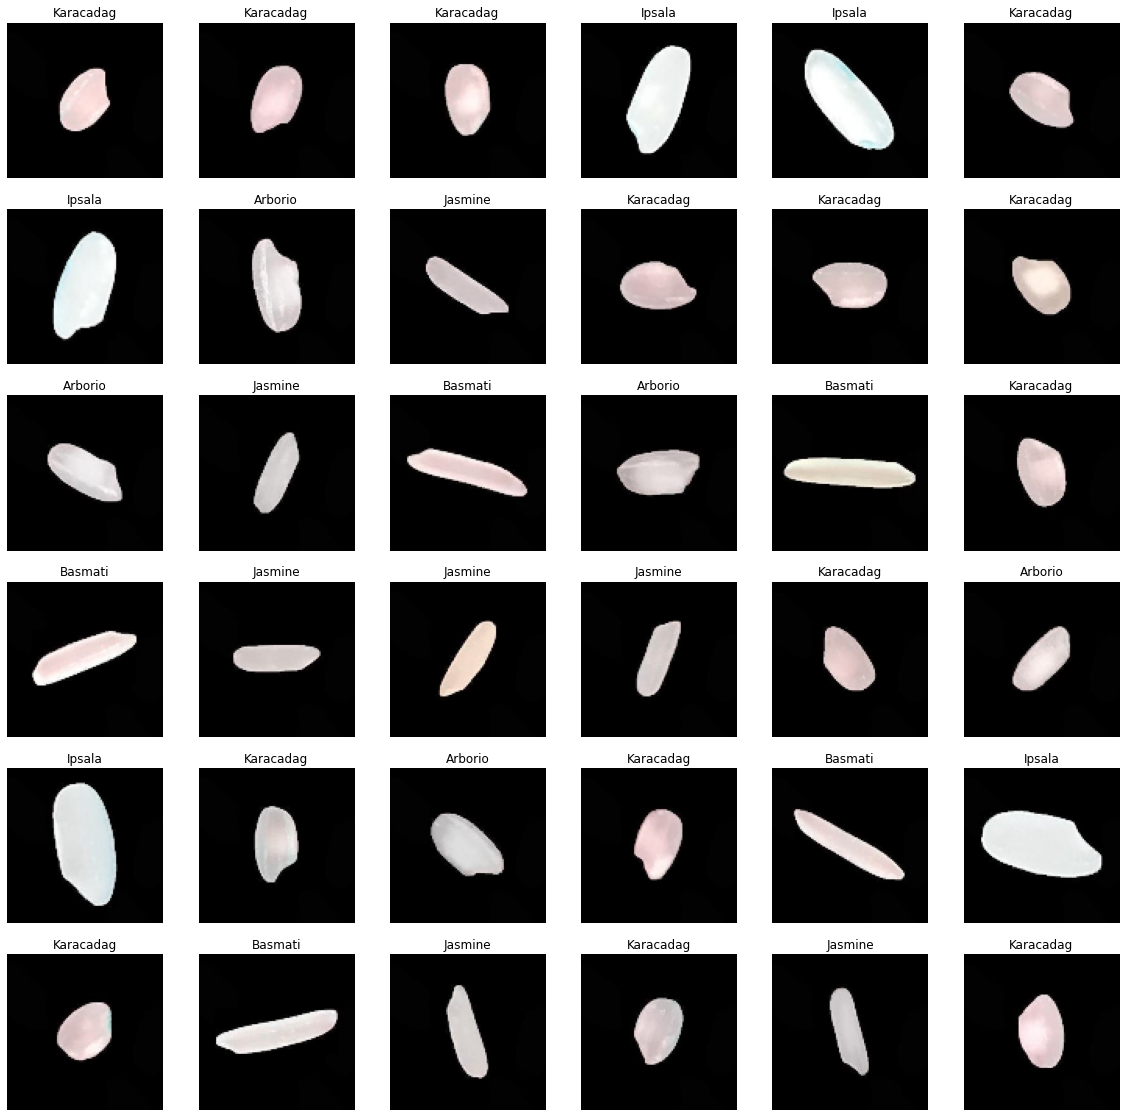

In [13]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_Images),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_Images[i])   
    plt.axis('off')
    plt.title(getcode(y_Types[i]))

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_Images, y_Types, train_size=0.9, shuffle=True)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [15]:
X_train.shape

(67500, 100, 100, 3)

In [16]:
# Define VGG16 Model
model = Sequential()
model.add(VGG16(include_top=False,weights='imagenet',input_shape=(100,100,3)))

model.add(Flatten())

model.add(Dense(units=1024, activation='relu'))

model.add(Dense(units=512, activation='relu'))

model.add(Dense(units=10, activation='softmax'))

58889256/58889256 [==============================] - 3s 0us/step


In [17]:
model.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 1024)              4719616   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 19,964,234
Trainable params: 19,964,234
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.fit(X_train, y_train, epochs=10,batch_size=256,verbose=1)

Epoch 1/10
264/264 [==============================] - 200s 685ms/step - loss: 1.1687 - accuracy: 0.7562
Epoch 2/10
264/264 [==============================] - 181s 686ms/step - loss: 0.0897 - accuracy: 0.9704
Epoch 3/10
264/264 [==============================] - 182s 691ms/step - loss: 0.0560 - accuracy: 0.9815
Epoch 4/10
264/264 [==============================] - 182s 690ms/step - loss: 0.0445 - accuracy: 0.9861
Epoch 5/10
264/264 [==============================] - 182s 690ms/step - loss: 0.0327 - accuracy: 0.9901
Epoch 6/10
264/264 [==============================] - 182s 691ms/step - loss: 0.0331 - accuracy: 0.9898
Epoch 7/10
264/264 [==============================] - 182s 690ms/step - loss: 0.1080 - accuracy: 0.9674
Epoch 8/10
264/264 [==============================] - 182s 690ms/step - loss: 0.0259 - accuracy: 0.9919
Epoch 9/10
264/264 [==============================] - 182s 690ms/step - loss: 0.0171 - accuracy: 0.9949
Epoch 10/10
264/264 [==============================] - 182s 690m

In [20]:
Loss, Accuracy = model.evaluate(X_test, y_test,batch_size=64)

118/118 [==============================] - 10s 70ms/step - loss: 0.0215 - accuracy: 0.9945


In [21]:
print('Test Loss is {}'.format(Loss))
print('Test Accuracy is {}'.format(Accuracy ))

Test Loss is 0.021489031612873077
Test Accuracy is 0.994533360004425


In [22]:
y_pred = model.predict(X_test)
print('Prediction Shape is {}'.format(y_pred.shape))

235/235 [==============================] - 9s 34ms/step
Prediction Shape is (7500, 10)


In [23]:
model.save("/content/my_model.h5")

In [24]:
model = load_model("my_model.h5")

In [25]:
Y_pred = model.predict(X_test, 100)
y_pred = np.argmax(Y_pred, axis=1)

75/75 [==============================] - 10s 104ms/step


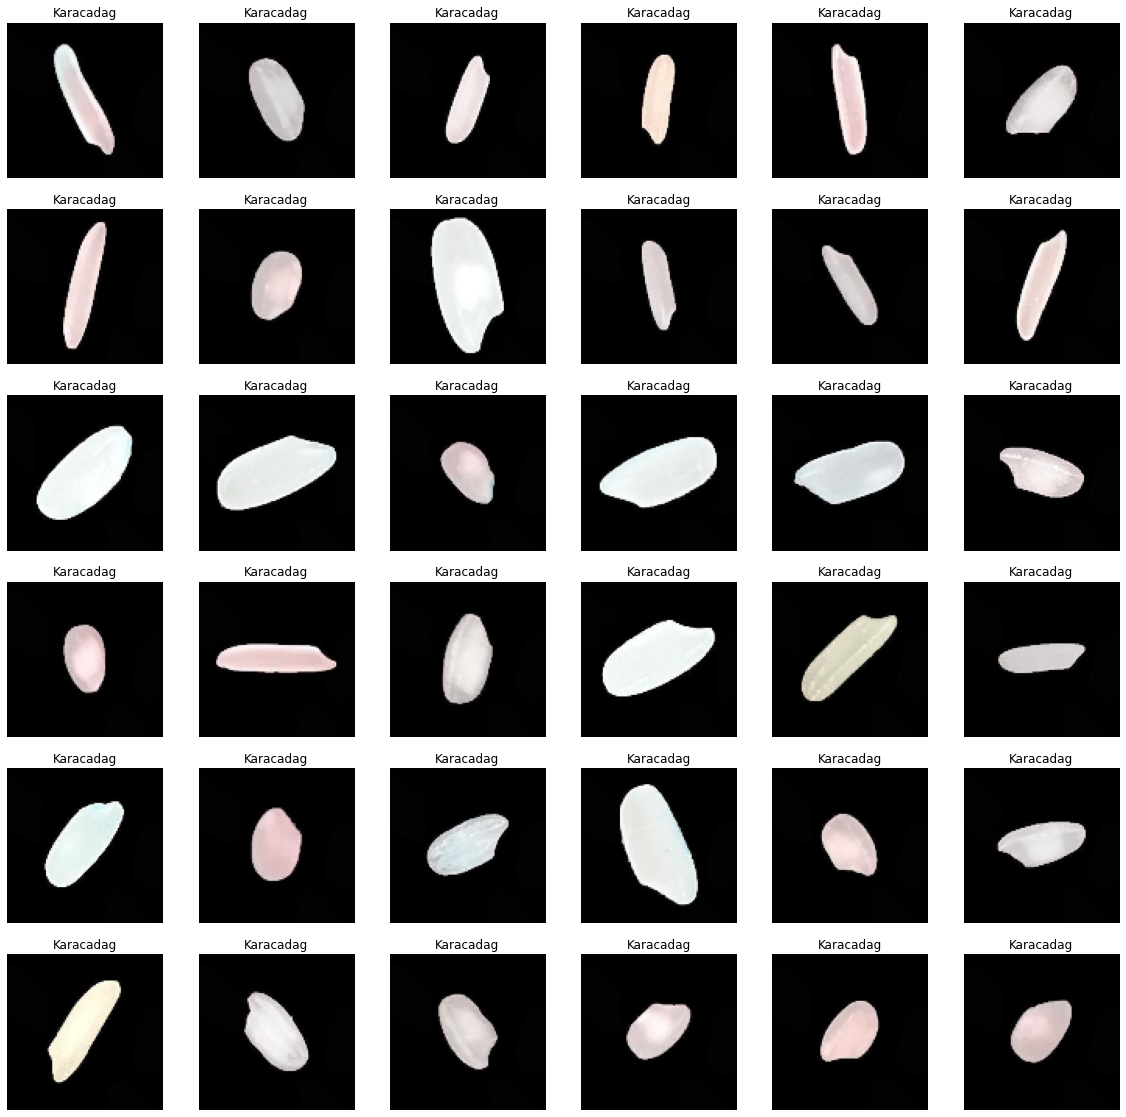

In [26]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])    
    plt.axis('off')
    plt.title(getcode(np.argmax(y_pred[i])))